In [ ]:
UNAD
John Sebastian Escobar Uchima
Predecir la enfermedad cardiaca Regresión loguística

In [ ]:
Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.
9. Crear una cuenta en GitHub y cargar los códigos de los modelos
diseñados https://github.com/

In [1]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [95]:
#Cargar las librerias requeridas

import pandas as pd # Manejor y análisis de estructura de datos
import numpy as np # Calculo numérico y el análisis de datos
import seaborn as sns # Creación graficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en 2 dimensiones

#Librerias para implementar modelos de ciencia de datos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [2]:
#Lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('D:/Tareas/7 semestre/Analisis de datos/archive (2)/winequality-red.csv')

In [3]:
#Realizamos lestura de los datos para el analisis exploratorio

Datos.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
#Descripción de los datos

Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 0, 'Acidez fija')

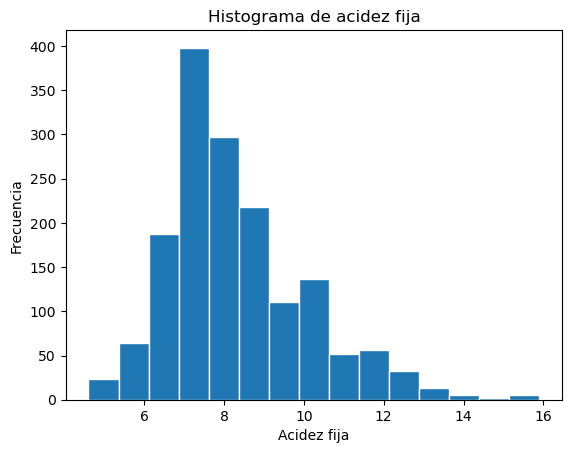

In [5]:
#Histogramas

plt.hist(Datos["fixed acidity"], bins=15, edgecolor="white")
plt.title("Histograma de acidez fija")
plt.ylabel("Frecuencia")
plt.xlabel("Acidez fija")

Text(0, 0.5, 'Frecuencia')

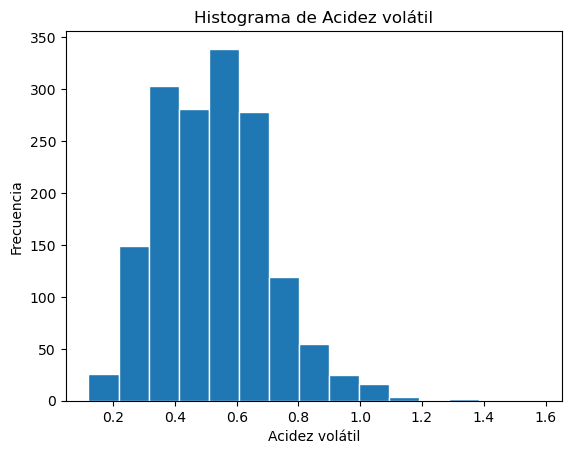

In [6]:
plt.hist(Datos["volatile acidity"], bins=15, edgecolor="white")
plt.title("Histograma de Acidez volátil")
plt.xlabel("Acidez volátil")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

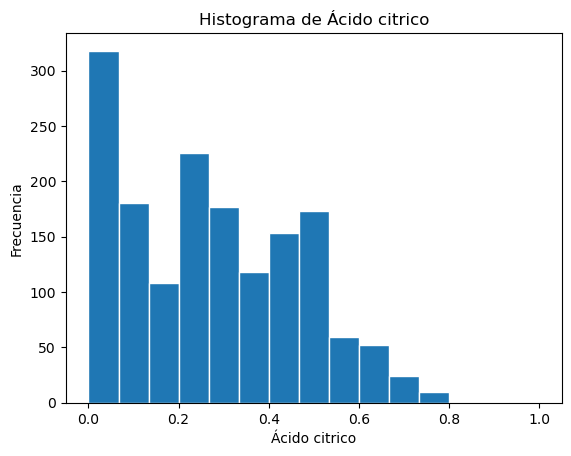

In [7]:
plt.hist(Datos["citric acid"], bins=15, edgecolor="white")
plt.title("Histograma de Ácido citrico")
plt.xlabel("Ácido citrico")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

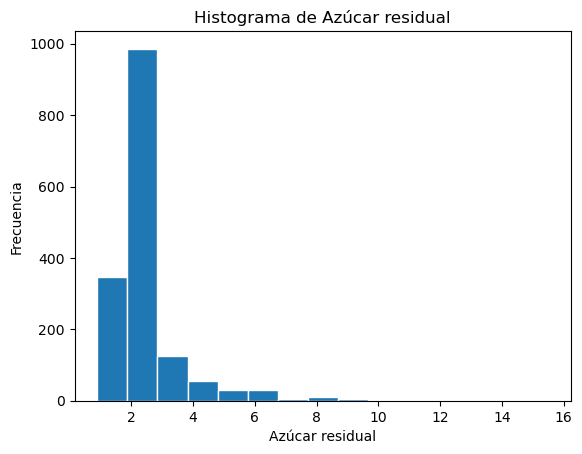

In [8]:
plt.hist(Datos["residual sugar"], bins=15, edgecolor="white")
plt.title("Histograma de Azúcar residual")
plt.xlabel("Azúcar residual")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

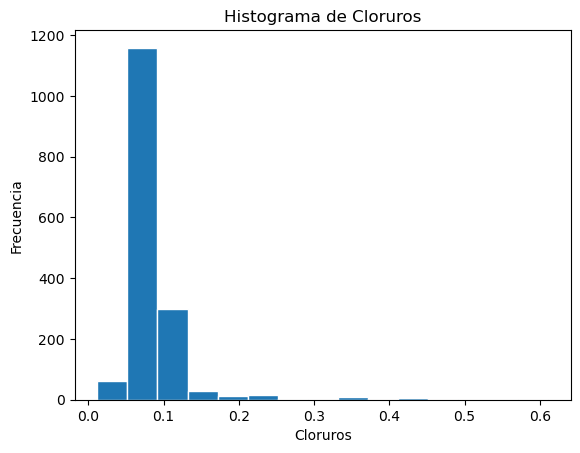

In [9]:
plt.hist(Datos["chlorides"], bins=15, edgecolor="white")
plt.title("Histograma de Cloruros")
plt.xlabel("Cloruros")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

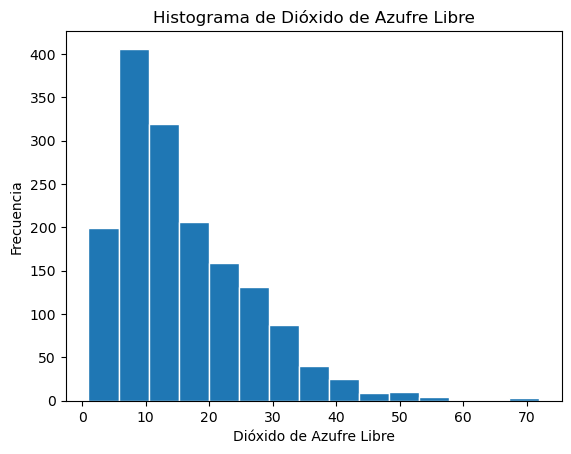

In [10]:
plt.hist(Datos["free sulfur dioxide"], bins=15, edgecolor="white")
plt.title("Histograma de Dióxido de Azufre Libre")
plt.xlabel("Dióxido de Azufre Libre")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

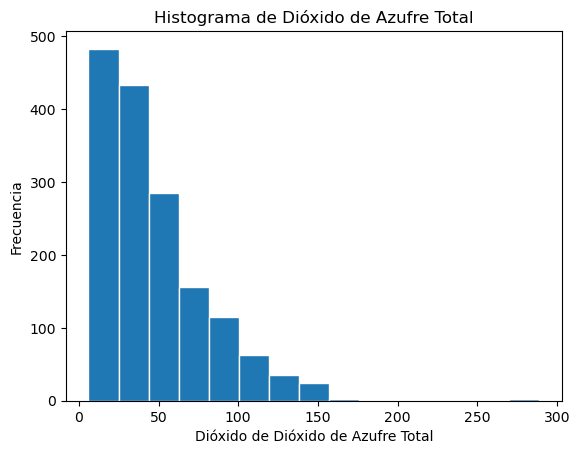

In [11]:
plt.hist(Datos["total sulfur dioxide"], bins=15, edgecolor="white")
plt.title("Histograma de Dióxido de Azufre Total")
plt.xlabel("Dióxido de Dióxido de Azufre Total")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

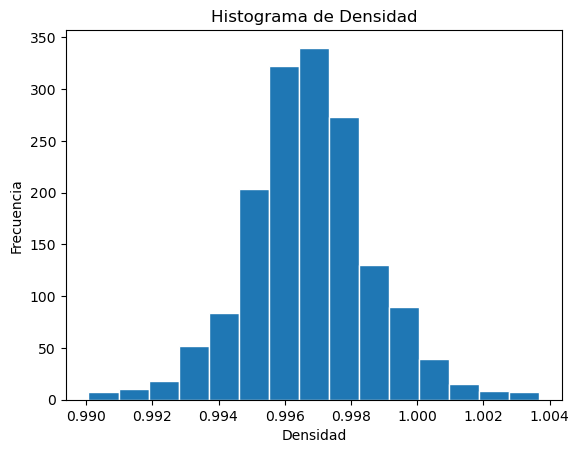

In [12]:
plt.hist(Datos["density"], bins=15, edgecolor="white")
plt.title("Histograma de Densidad")
plt.xlabel("Densidad")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

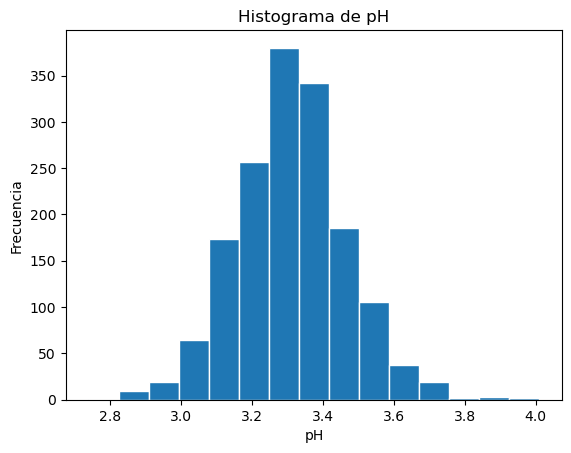

In [13]:
plt.hist(Datos["pH"], bins=15, edgecolor="white")
plt.title("Histograma de pH")
plt.xlabel("pH")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

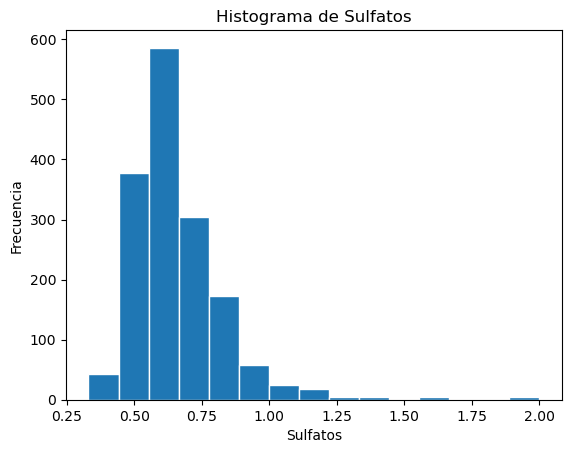

In [14]:
plt.hist(Datos["sulphates"], bins=15, edgecolor="white")
plt.title("Histograma de Sulfatos")
plt.xlabel("Sulfatos")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

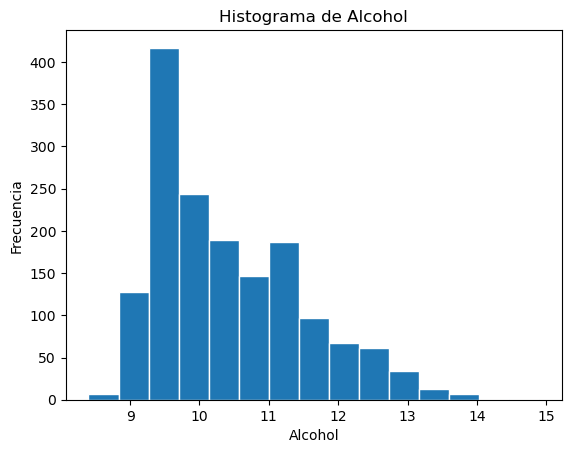

In [15]:
plt.hist(Datos["alcohol"], bins=15, edgecolor="white")
plt.title("Histograma de Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

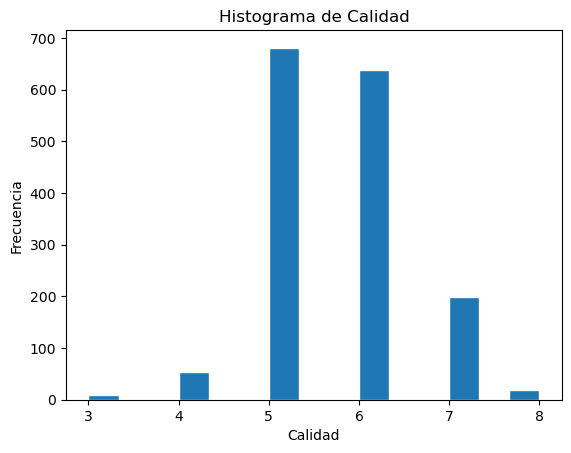

In [16]:
plt.hist(Datos["quality"], bins=15, edgecolor="white")
plt.title("Histograma de Calidad")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")

In [ ]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [17]:
#Eliminación de datos nulos

Datos.dropna(inplace=True, axis=0, how='any')

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

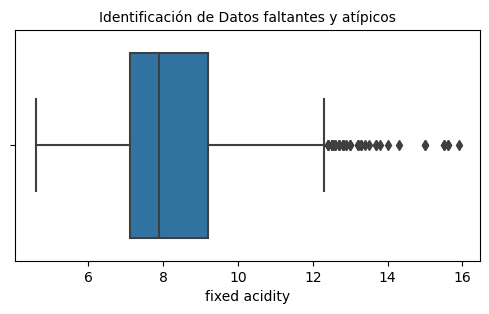

In [18]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['fixed acidity'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [19]:
#Es normal ver vinos demasiado acidos

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

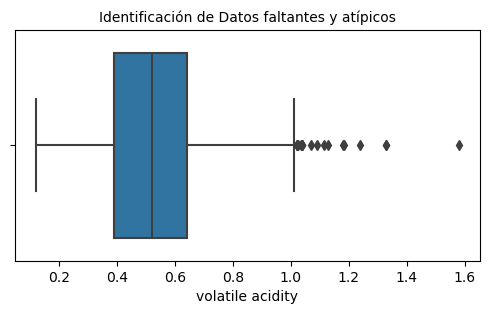

In [20]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['volatile acidity'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [21]:
#La acidez volatil esta en lo normal

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

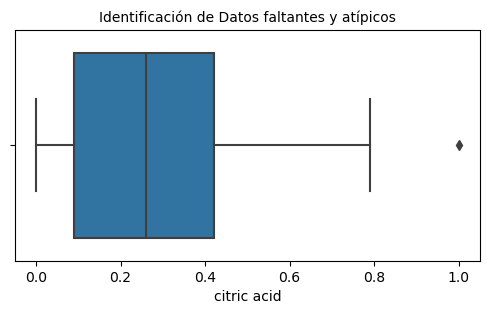

In [22]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['citric acid'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [23]:
#No es necesario tratar esta variable

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

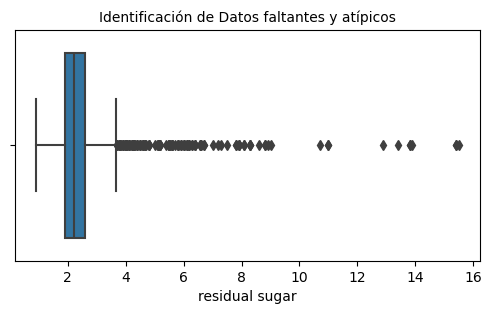

In [24]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['residual sugar'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [25]:
#Para mi esta en lo normal de azucar que debe tener un vino, e inclusive hay vinos demasiado dulces

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

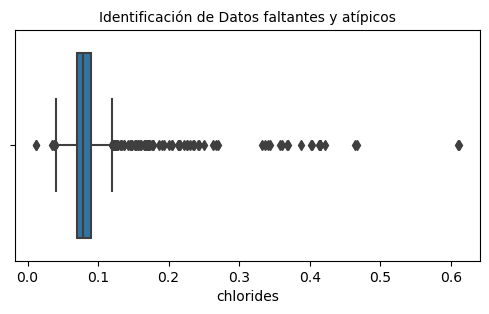

In [26]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chlorides'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [27]:
#Esta variable no requiere tratamiento, ya que el maximo que investigue que puede tener un vino de cloruros es de 0.80

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

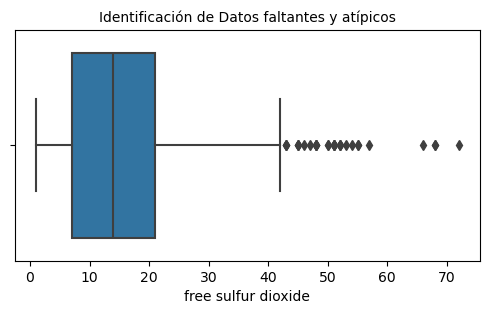

In [28]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['free sulfur dioxide'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [29]:
#No requiere tratamiento, ya que se encuentra en lo normal

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

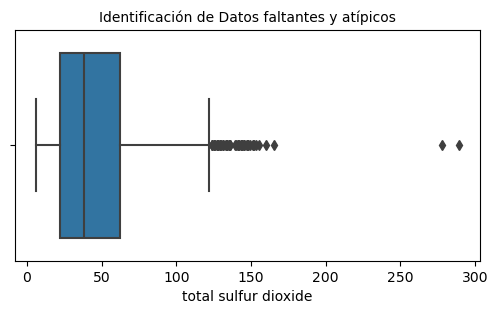

In [30]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['total sulfur dioxide'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [31]:
#Requiere tratamiento ya que no puede superar los 200, que es lo que lleva un vino blanco o rosado como maximo

In [32]:
Total_Atípicos=((Datos['total sulfur dioxide']>200)).sum()
print("el total de datos atípicos es {}".format(Total_Atípicos))

el total de datos atípicos es 2


In [33]:
#Filtra datos atípicos
Datos=Datos[(Datos['total sulfur dioxide']<200)]

Text(0.5, 1.0, 'Comprobación de eliminación de dato atípicos')

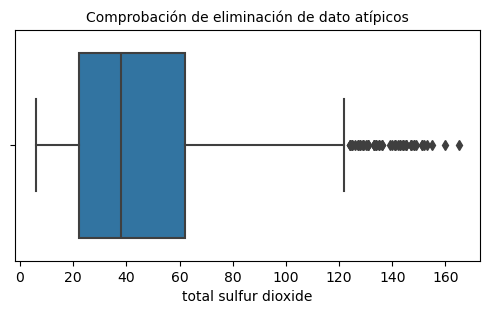

In [34]:
#Comprobamos si se eliminaron correctamente los datos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['total sulfur dioxide'])
plt.title('Comprobación de eliminación de dato atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

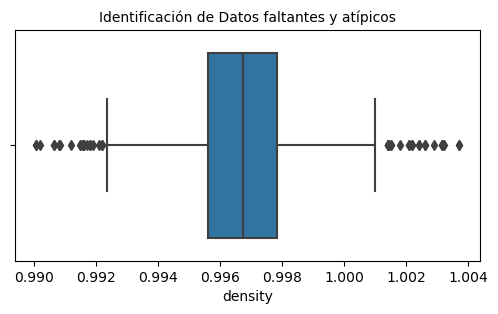

In [35]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['density'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [36]:
#Esta en lo normal de densidad que debe tener un vino

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

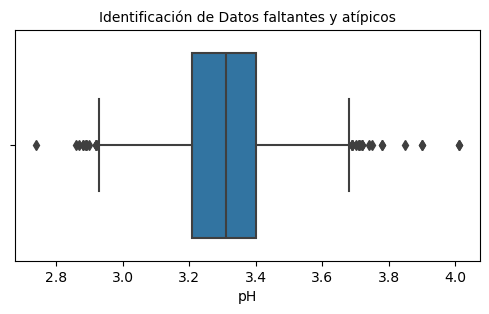

In [37]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['pH'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

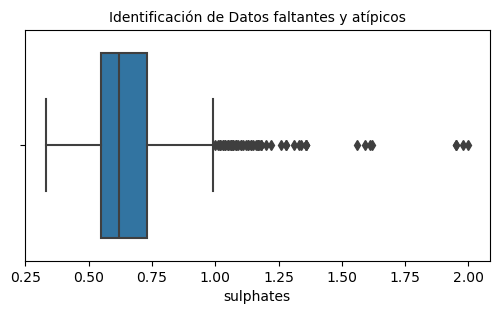

In [38]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['sulphates'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [ ]:
#En mi opinión es normal ver estas cantidades de sulfatos en el vino

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

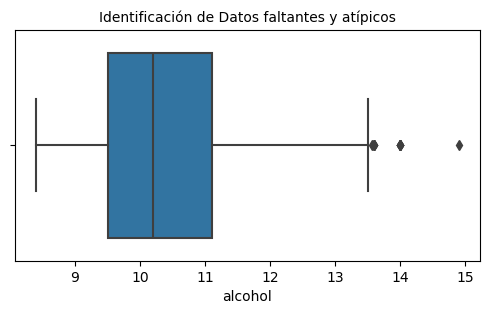

In [39]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['alcohol'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [ ]:
#Son cantidades de alcohol muy normales en el vino, ya que hay vinos con mas alcohol y otro con menos

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

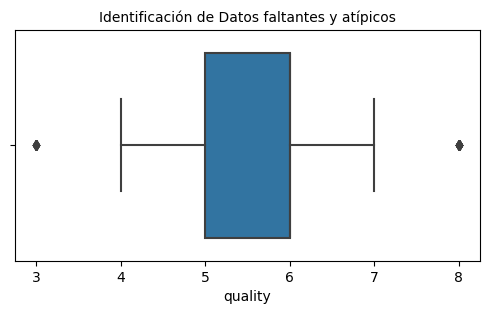

In [40]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['quality'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

In [ ]:
#No toca realizar ningun tratamiento a la calidad, ya que se mide de 0 a 10

In [ ]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

    #Caracteristica de interes:

#Calidad: En esta podemos encontrar la puntuación que se le brinda al vino de 0 a 10 siendo 0 mala puntuación y 10 buena puntuación.

In [41]:
#Total de personas con enfermedad cardíaca

Datos['quality'].value_counts()

quality
5    681
6    638
7    197
4     53
8     18
3     10
Name: count, dtype: int64

In [42]:
predictors_col = ["alcohol", "pH", "residual sugar", "sulphates", "density"]
target_col = ['quality']

In [44]:
predictors =Datos[predictors_col]
target = Datos[target_col]

In [45]:
predictors

,alcohol,pH,residual sugar,sulphates,density
0,9.4,3.51,1.9,0.56,0.99780
1,9.8,3.20,2.6,0.68,0.99680
2,9.8,3.26,2.3,0.65,0.99700
3,9.8,3.16,1.9,0.58,0.99800
4,9.4,3.51,1.9,0.56,0.99780
...,...,...,...,...,...
1594,10.5,3.45,2.0,0.58,0.99490
1595,11.2,3.52,2.2,0.76,0.99512
1596,11.0,3.42,2.3,0.75,0.99574
1597,10.2,3.57,2.0,0.71,0.99547


In [46]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [48]:
corr=predictors.corr()
corr

,alcohol,pH,residual sugar,sulphates,density
alcohol,1.000000,0.210850,0.033473,0.095756,-0.494064
pH,0.210850,1.000000,-0.076653,-0.199355,-0.347961
residual sugar,0.033473,-0.076653,1.000000,0.010114,0.369732
sulphates,0.095756,-0.199355,0.010114,1.000000,0.146828
density,-0.494064,-0.347961,0.369732,0.146828,1.000000


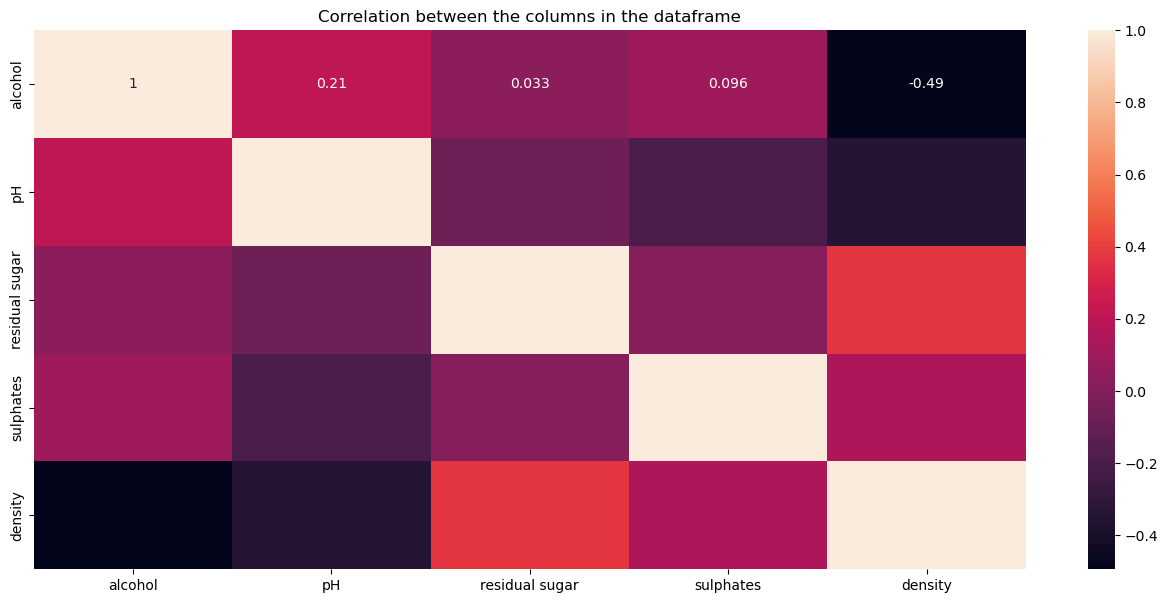

In [50]:
plt.figure(figsize = (16,7))
sns.heatmap(predictors.corr(), annot = True)
plt.title('Correlation between the columns in the dataframe')
plt.show()

In [ ]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [51]:
#Usamos la función train_test_split que nos permite realizar la división de un conjunto de datos

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.25, random_state=0)

In [52]:
X_train

,alcohol,pH,residual sugar,sulphates,density
140,9.6,3.19,1.9,0.82,0.99650
1036,12.5,3.22,2.5,0.59,0.99356
720,9.6,3.22,2.0,0.44,0.99760
77,10.7,3.52,2.4,0.55,0.99660
39,10.5,3.33,5.9,0.83,0.99780
...,...,...,...,...,...
763,9.6,3.25,2.0,0.42,0.99738
835,9.3,3.39,1.5,0.51,0.99655
1218,10.6,3.24,1.9,0.69,0.99600
559,12.7,3.30,4.3,0.68,1.00210


In [54]:
Y_train

,quality
140,5
1036,7
720,5
77,6
39,5
...,...
763,5
835,5
1218,6
559,6


In [55]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [56]:
tree = DecisionTreeClassifier()

In [58]:
arbol = tree.fit(X_train, Y_train)

[Text(0.5065184396520478, 0.9791666666666666, 'x[0] <= 10.35\ngini = 0.644\nsamples = 1197\nvalue = [7, 44, 506, 480, 148, 12]'),
 Text(0.19716722544400145, 0.9375, 'x[3] <= 0.575\ngini = 0.534\nsamples = 666\nvalue = [4, 24, 400, 214, 23, 1]'),
 Text(0.0724560529177238, 0.8958333333333334, 'x[0] <= 9.533\ngini = 0.422\nsamples = 279\nvalue = [2, 15, 204, 56, 2, 0]'),
 Text(0.027206415367886917, 0.8541666666666666, 'x[0] <= 9.075\ngini = 0.312\nsamples = 147\nvalue = [0, 5, 120, 21, 1, 0]'),
 Text(0.012866980790141355, 0.8125, 'x[2] <= 2.05\ngini = 0.62\nsamples = 10\nvalue = [0, 2, 3, 5, 0, 0]'),
 Text(0.007067778180500181, 0.7708333333333334, 'x[4] <= 0.996\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2, 0, 0, 0]'),
 Text(0.004168176875679594, 0.7291666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.009967379485320768, 0.7291666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.01866618339978253, 0.7708333333333334, 'x[1] <= 3.09\ngini =

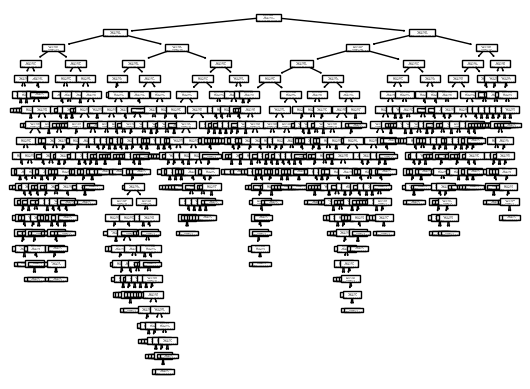

In [61]:
plot_tree(arbol)

In [62]:
#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [63]:
predicciones = arbol.predict(X_test)
predicciones

array([7, 4, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 5, 5, 6, 4, 6, 5, 7, 8, 6, 6, 5, 7, 7, 6, 4, 5, 6, 5, 7, 7, 6,
       6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 6, 5, 5, 5, 7, 7, 5, 6, 6, 6, 5, 7,
       7, 5, 5, 6, 6, 4, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5,
       6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 6, 6, 5,
       6, 5, 7, 7, 5, 7, 6, 7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 8, 7, 6, 6,
       6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 7, 7, 6, 5, 7, 6, 5,
       6, 7, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 7, 7, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 5, 6, 5, 6, 5, 7, 7, 6, 5, 6, 7, 5, 7, 5, 6, 5, 6, 6, 5,
       5, 8, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6,
       5, 6, 5, 6, 4, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6, 5, 5, 4, 5,
       5, 5, 7, 6, 5, 6, 6, 6, 5, 7, 7, 6, 5, 5, 5,

In [64]:
#Examinamos la matriz de confusión

In [66]:
pd.crosstab(np.array([y[0]for y in Y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,2,0,0
4,0,0,4,5,0,0
5,0,4,112,48,10,1
6,1,5,34,92,26,0
7,0,2,4,18,23,2
8,0,0,0,2,4,0


In [97]:
Accuracy = accuracy_score(Y_test, predicciones)
Precision = precision_score(Y_test, predicciones, average=None)
F1 = f1_score(Y_test, predicciones, average=None)
Recall = recall_score(Y_test, predicciones, average=None)
              
print(f"Accuracy: {Accuracy}")
print(f"Precisión: {Precision}")
print(f"F1: {F1}")
print(f"Recall: {Recall}")

Accuracy: 0.5675
Precisión: [0.         0.         0.72258065 0.5508982  0.36507937 0.        ]
F1: [0.         0.         0.67878788 0.56615385 0.41071429 0.        ]
Recall: [0.         0.         0.64       0.58227848 0.46938776 0.        ]


In [ ]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

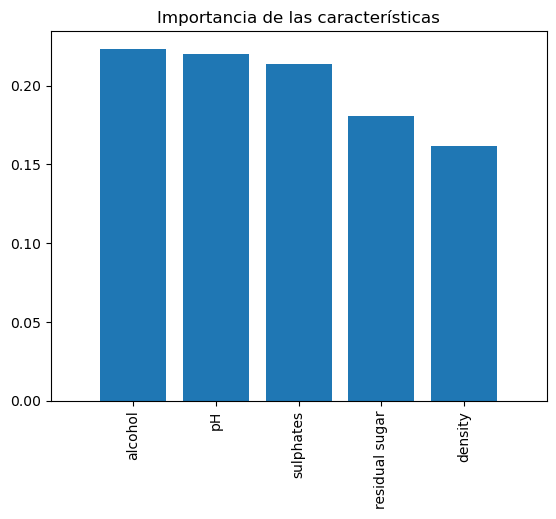

In [71]:
importances = arbol.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), predictors.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()